# Prepare Data for Alouette Microapplication

#### Updated: Feb 1, 2023

#  

Shape processed image results data to fit current Alouette microapplication (https://donnees-data.asc-csa.gc.ca:8888/alouette/):

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randrange

In [11]:
localDir = 'C:/Users/rnaidoo/Documents/Projects_data/Alouette_I/'

#  

#### Functions:

In [29]:
def fix_Lat(x):
    
    if type(x) == str:
        x = x.replace('S', '')
        #x = x.astype(float)
        x = -1*x

    return x

In [22]:
def fix_Lng(x):
    
    x = x.replace('W', '')
    #x = x.astype(float)
    x = -1*x

    return x

#  

#### Shape 'result_total.csv' (processed image results) to fit current Alouette microapplication data model:

Load current microapplication data:

In [12]:
df_current = pd.read_csv(localDir + 'microapplication_total_data_retr20230113.csv')
print(len(df_current))
df_current.head()

406566


,ID,File name,Minimum frequency,Maximum depth,Subdirectory name,Satellite number,Ground station number,Timestamp,Ground station name,Ground station code,Latitude,Longitude
0,0,R014207938/907-A/1,1.709677,974.545455,907-A,1,1,1965-05-25 16:48:01,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
1,1,R014207938/907-A/10,1.645161,1032.727273,907-A,1,1,1965-05-25 16:50:58,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
2,2,R014207938/907-A/100,1.701613,989.090909,907-A,1,1,1965-05-26 08:34:21,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
3,3,R014207938/907-A/101,1.685484,1080.000000,907-A,1,1,1965-05-26 08:34:38,"Resolute Bay, No. W. Territories",RES,74.7,-95.0
4,4,R014207938/907-A/102,1.681452,203.636364,907-A,1,1,1965-05-26 08:34:58,"Resolute Bay, No. W. Territories",RES,74.7,-95.0


Load current results to test:

In [13]:
#Load BATCH_I_Run1 results
df_result = pd.read_csv(localDir + 'result_total_v20230113.csv')

#Load BATCH_I_Run1 (metadata reprocessed (mdrp)) results
df_result_mdrp = pd.read_csv(localDir + 'result_total_mdrp_v20230116.csv')

c:\DevSoftware\Anaconda38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,21,22,23,24,25,26,27,28,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\DevSoftware\Anaconda38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,21,22,23,24,25,26,27,28,31,57,60,64,65,66,67,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
#Load random subdirectory from BATCH_I_Run2
'''L_dir = 'L:/DATA/Alouette_I/BATCH_I_Run2/'
resultDir = L_dir + '05_result/'
logDir = L_dir + '06_log/'
roll_list = []
for roll in os.listdir(resultDir):
    if 'R' in roll:
        roll_list.append(roll)
roll = roll_list[randrange(len(roll_list))]
file_list = []
for file in os.listdir(resultDir + roll + '/'):
    if 'result' in file:
        file_list.append(file)
fn = file_list[randrange(len(file_list))]
df_result = pd.read_csv(resultDir + roll + '/' + fn)
print(roll + '/' + fn)'''

In [ ]:
#Load random subdirectory from BATCH_I_Run1_md, merge with BATCH_I_Run1
'''L_dir = 'L:/DATA/Alouette_I/BATCH_I_Run1/'
L_dir_md = 'L:/DATA/Alouette_I/BATCH_I_Run1_md/'
resultDir = L_dir + '05_result/'
resultDir_md = L_dir_md + '05_result/'
logDir = L_dir + '06_log/'
roll_list = []
for roll in os.listdir(resultDir_md):
    if 'R' in roll:
        roll_list.append(roll)
roll = roll_list[randrange(len(roll_list))]
file_list = []
for file in os.listdir(resultDir + roll + '/'):
    if 'result' in file:
        file_list.append(file)
fn = file_list[randrange(len(file_list))]
df_result = pd.read_csv(resultDir + roll + '/' + fn)
df_result_md = pd.read_csv(resultDir_md + roll + '/' + fn)
print(roll + '/' + fn)
print(len(df_result))
print(len(df_result_md))
df_result = df_result.drop(['satellite_number', 'year', 'day', 'hour', 'minute', 'second', 'station_number', 
                            'Station Name', '3 - Letter Code', 'LAT.', 'LONG. '], axis=1)
df_result_md = df_result_md.drop(['processed_image_class', 'func_name', 'details'], axis=1)
df_result = df_result.merge(df_result_md, how='left', on=['Roll', 'Subdirectory', 'filename'])'''

Characterize:

In [14]:
print(len(df_result))
df_result.head()

817910


,fmin,max_depth,satellite_number,year,day,hour,minute,second,station_number,Station Name,...,raw_coord,window_coord,mapping_Hz,mapping_km,details,Roll,Subdirectory,filename,rotated_metadata,station_code
0,1.5,387.500000,1.0,1961.0,3.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,10.png,NaN,NaN
1,1.5,556.250000,1.0,1961.0,2.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,101.png,NaN,NaN
2,1.5,654.166667,0.0,1960.0,2.0,2.0,3.0,2.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,102.png,NaN,NaN
3,1.5,504.166667,0.0,1960.0,2.0,2.0,3.0,2.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,106.png,NaN,NaN
4,1.5,504.166667,0.0,1961.0,2.0,2.0,2.0,3.0,3.0,"Ottawa, Canada",...,NaN,NaN,NaN,NaN,NaN,R014207815,3488-15A,107.png,NaN,NaN


In [37]:
#If loaded single subdirectory
'''subdir_id = fn.replace('result-', '')
subdir_id = subdir_id.replace('.csv', '')
df_process_log = pd.read_csv(logDir + 'process_log.csv')
df_process_log.loc[df_process_log['subdir_id'] == subdir_id]'''

"subdir_id = fn.replace('result-', '')\nsubdir_id = subdir_id.replace('.csv', '')\ndf_process_log = pd.read_csv(logDir + 'process_log.csv')\ndf_process_log.loc[df_process_log['subdir_id'] == subdir_id]"

In [15]:
df_result.columns

Index(['fmin', 'max_depth', 'satellite_number', 'year', 'day', 'hour',
       'minute', 'second', 'station_number', 'Station Name', '3 - Letter Code',
       'LAT.', 'LONG. ', 'processed_image_class', 'func_name', 'limits',
       'height', 'width', 'metadata_type', 'meta_height', 'meta_width',
       'x_centroids', 'y_centroids', 'is_dot', 'dict_metadata', 'raw_coord',
       'window_coord', 'mapping_Hz', 'mapping_km', 'details', 'Roll',
       'Subdirectory', 'filename', 'rotated_metadata', 'station_code'],
      dtype='object')

In [16]:
Run1_cols = ['fmin', 'max_depth', 'processed_image_class', 'func_name', 'limits', 'height', 'width', 'raw_coord', 
             'window_coord', 'mapping_Hz', 'mapping_km', 'details']
Run1_md_cols = ['satellite_number', 'year', 'day', 'hour', 'minute', 'second', 'station_number', 'Station Name', 
                '3 - Letter Code', 'LAT.', 'LONG. ', 'metadata_type', 'meta_height', 'meta_width', 'x_centroids', 
                'y_centroids', 'is_dot', 'dict_metadata', 'day_1', 'day_2', 'day_3', 'hour_1', 'hour_2', 'minute_1',
                'minute_2', 'second_1', 'second_2', 'station_number_1', 'station_number_2', 'station_code']

for col in Run1_cols:
    df_result_mdrp[col] = df_result_mdrp[col + '_Run1']
for col in Run1_md_cols:
    df_result_mdrp[col] = df_result_mdrp[col + '_Run1_md']

<AxesSubplot:xlabel='year', ylabel='Count'>

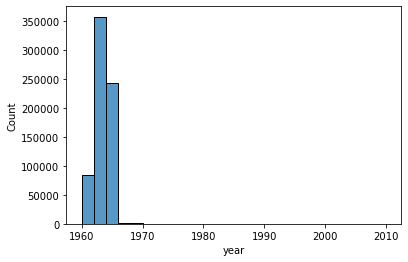

In [15]:
sns.histplot(data=df_result, x='year', bins=25)

(0.0, 365.0)

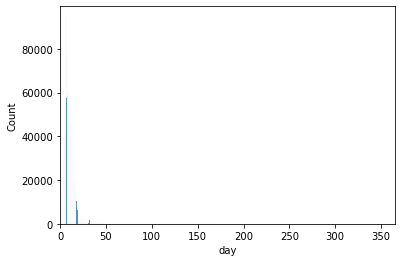

In [16]:
sns.histplot(data=df_result, x='day')
plt.xlim(0, 365)

(0.0, 24.0)

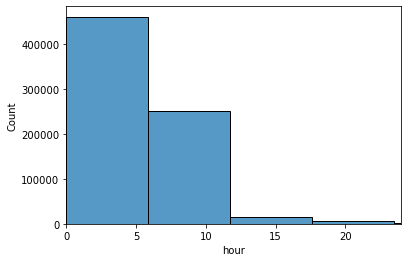

In [17]:
sns.histplot(data=df_result, x='hour', bins=24)
plt.xlim(0, 24)

(0.0, 60.0)

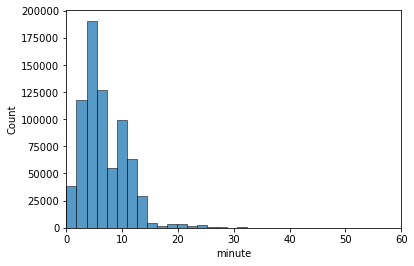

In [18]:
sns.histplot(data=df_result, x='minute', bins=60)
plt.xlim(0, 60)

(0.0, 60.0)

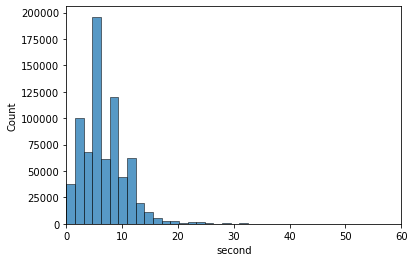

In [19]:
sns.histplot(data=df_result, x='second', bins=60)
plt.xlim(0, 60)

After metadata reprocessing:

<AxesSubplot:xlabel='year', ylabel='Count'>

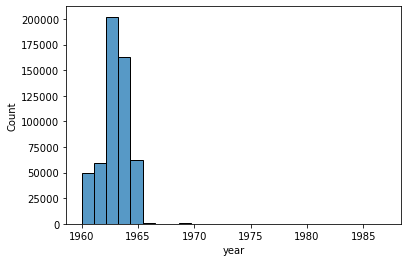

In [20]:
sns.histplot(data=df_result_mdrp, x='year', bins=25)

(0.0, 365.0)

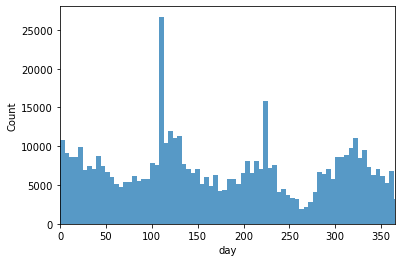

In [21]:
sns.histplot(data=df_result_mdrp, x='day')
plt.xlim(0, 365)

(0.0, 24.0)

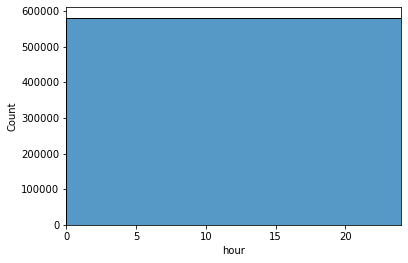

In [22]:
sns.histplot(data=df_result_mdrp, x='hour', bins=24)
plt.xlim(0, 24)

(0.0, 60.0)

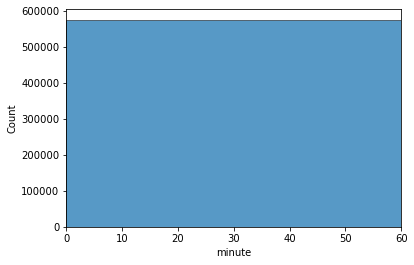

In [23]:
sns.histplot(data=df_result_mdrp, x='minute', bins=60)
plt.xlim(0, 60)

(0.0, 60.0)

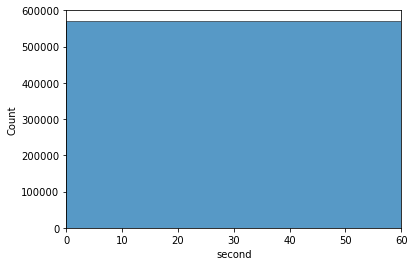

In [24]:
sns.histplot(data=df_result_mdrp, x='second', bins=60)
plt.xlim(0, 60)

Shape results to fit microapplication data model:

In [17]:
df_result = df_result_mdrp
df_result['ID'] = df_result.index
df_result['File name'] = df_result['Roll'].astype(str) + '/' + df_result['Subdirectory'].astype(str) + '/' + df_result['filename'].str.replace('.png', '')
df_result['Minimum frequency'] = df_result['fmin']
df_result['Maximum depth'] = df_result['max_depth']
df_result['Subdirectory name'] = df_result['Subdirectory']
df_result['Satellite number'] = df_result['satellite_number']
df_result['Ground station number'] = df_result['station_number']
df_result['Ground station name'] = df_result['Station Name']
df_result['Ground station code'] = df_result['3 - Letter Code']
df_result['Latitude'] = df_result['LAT.']
df_result['Longitude'] = df_result['LONG. ']

<ipython-input-17-b6e43a00ed75>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_result['File name'] = df_result['Roll'].astype(str) + '/' + df_result['Subdirectory'].astype(str) + '/' + df_result['filename'].str.replace('.png', '')


In [18]:
#Constuct timestamp
df_result['day_of_year'] = df_result['day']
df_result['day_of_year'] = df_result['day_of_year'].apply(lambda x: np.nan if x==0 else x)
df_result['day_of_year'] = df_result['day_of_year'].apply(lambda x: np.nan if x>365 else x)
df_result['month_day'] = pd.to_datetime(df_result['day_of_year'], format='%j').dt.strftime('%m-%d')
df_result['month'] = df_result['month_day'].str.split('-').str[0]
df_result['day'] = df_result['month_day'].str.split('-').str[1]
df_result['Timestamp'] = pd.to_datetime(df_result[['year', 'month', 'day', 'hour', 'minute', 'second']], format='%Y-%m-%d %H:%M:%S')

In [19]:
df1 = df_result[list(df_current.columns)]
print(len(df1))
df1.head()

812606


,ID,File name,Minimum frequency,Maximum depth,Subdirectory name,Satellite number,Ground station number,Timestamp,Ground station name,Ground station code,Latitude,Longitude
0,0,R014207815/3488-15A/10,1.5,387.500000,3488-15A,1.0,12.0,1961-04-21 11:11:12,"Woomera, Austalia",WOO,31.1S,136.8E
1,1,R014207815/3488-15A/101,1.5,556.250000,3488-15A,1.0,12.0,1961-01-11 11:11:21,"Woomera, Austalia",WOO,31.1S,136.8E
2,2,R014207815/3488-15A/102,1.5,654.166667,3488-15A,0.0,21.0,1960-04-11 20:21:11,"Orroral Valley, Australia",RAL,35.6S,149E
3,3,R014207815/3488-15A/106,1.5,504.166667,3488-15A,0.0,21.0,1960-04-20 20:21:11,"Orroral Valley, Australia",RAL,35.6S,149E
4,4,R014207815/3488-15A/107,1.5,504.166667,3488-15A,0.0,12.0,1961-01-11 11:20:21,"Woomera, Austalia",WOO,31.1S,136.8E


#  

#### Adjust Lat, Lng:

In [46]:
df1['Latitude'] = df1['Latitude'].fillna('')

<ipython-input-46-008c3a16b3f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Latitude'] = df1['Latitude'].fillna('')


In [49]:
df1['Latitude'] = df1['Latitude'].apply(lambda x: fix_Lat(x) if 'S' in x else x)
df1['Latitude'] = df1['Latitude'].str.replace('N', '')

<ipython-input-49-d9b4edfe884f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Latitude'] = df1['Latitude'].apply(lambda x: fix_Lat(x) if 'S' in x else x)
<ipython-input-49-d9b4edfe884f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Latitude'] = df1['Latitude'].str.replace('N', '')


In [50]:
df1['Longitude'] = df1['Longitude'].fillna('')

<ipython-input-50-fc4f9a02df02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Longitude'] = df1['Longitude'].fillna('')


In [52]:
df1['Longitude'] = df1['Longitude'].apply(lambda x: fix_Lng(x) if 'W' in x else x)
df1['Longitude'] = df1['Longitude'].str.replace('E', '')

<ipython-input-52-f969899e1882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Longitude'] = df1['Longitude'].apply(lambda x: fix_Lng(x) if 'W' in x else x)
<ipython-input-52-f969899e1882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Longitude'] = df1['Longitude'].str.replace('E', '')


#  

#### Adjust years:

In [57]:
df1['Timestamp'] = df1['Timestamp'] + pd.offsets.DateOffset(years=2)

<ipython-input-57-7cbefc1aa568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Timestamp'] = df1['Timestamp'] + pd.offsets.DateOffset(years=2)


#  

#### Compare random sample of results with current microapplication data:

In [61]:
df_sample = df1.sample(10)
df_sample = df_sample.add_suffix('_sample')
df_sample

,ID_sample,File name_sample,Minimum frequency_sample,Maximum depth_sample,Subdirectory name_sample,Satellite number_sample,Ground station number_sample,Timestamp_sample,Ground station name_sample,Ground station code_sample,Latitude_sample,Longitude_sample
340979,340979,R014207942/1953-9B/271,1.661290,1080.000000,1953-9B,1.0,9.0,1966-08-16 20:36:55,"South Atlantic, Falkland Islands",SOL,,
392126,392126,R014207947/1880-12A/60,3.063636,1184.905660,1880-12A,1.0,14.0,1966-06-03 05:19:58,"Blossom Point, Maryland",BPT,38.4,
549796,549796,R014207958/2826-50B/272,1.504032,650.000000,2826-50B,NaN,NaN,NaT,NaN,NaN,,
333487,333487,R014207940F/426/Image0052,1.500000,1403.225806,426,1.0,3.0,1965-02-09 23:16:34,"Ottawa, Canada",OTT,45.4,
532692,532692,R014207957/2631-1A/88,1.745968,1280.769231,2631-1A,1.0,1.0,1967-06-08 07:14:00,"Blossom Point, Maryland",BPT,38.4,
465763,465763,R014207953/2655-1A/230,1.697581,1119.230769,2655-1A,1.0,1.0,1967-06-20 12:36:35,"Blossom Point, Maryland",BPT,38.4,
444994,444994,R014207951/2410-4B/163,1.665323,1366.666667,2410-4B,6.0,1.0,1963-07-10 14:48:05,"Resolute Bay, No.W.Territories",RES,74.7,
597260,597260,R014207962/1472-5A/202,1.729839,1484.615385,1472-5A,1.0,5.0,1966-01-25 14:41:57,"College, Fairbanks, Alaska",COL,64.9,
106692,106692,R014207840/3019-43A/24,1.608871,1310.204082,3019-43A,2.0,12.0,1963-04-21 11:20:21,"Woomera, Austalia",WOO,,136.8
158424,158424,R014207844/2902-43B/267,1.645161,1300.000000,2902-43B,NaN,NaN,NaT,NaN,NaN,,


In [62]:
df_merge = df_sample.merge(df_current, left_on='File name_sample', right_on='File name')
df_merge

,ID_sample,File name_sample,Minimum frequency_sample,Maximum depth_sample,Subdirectory name_sample,Satellite number_sample,Ground station number_sample,Timestamp_sample,Ground station name_sample,Ground station code_sample,...,Minimum frequency,Maximum depth,Subdirectory name,Satellite number,Ground station number,Timestamp,Ground station name,Ground station code,Latitude,Longitude
0,340979,R014207942/1953-9B/271,1.661290,1080.000000,1953-9B,1.0,9.0,1966-08-16 20:36:55,"South Atlantic, Falkland Islands",SOL,...,1.661290,1080.000000,1953-9B,1,9,1966-08-16 20:36:55,"South Atlantic, Falkland Islands",SOL,-51.8,-57.9
1,392126,R014207947/1880-12A/60,3.063636,1184.905660,1880-12A,1.0,14.0,1966-06-03 05:19:58,"Blossom Point, Maryland",BPT,...,3.063636,1184.905660,1880-12A,1,14,1966-06-03 05:19:58,"East Grand Forks, Minnesota",GRK,48.0,-97.1
2,532692,R014207957/2631-1A/88,1.745968,1280.769231,2631-1A,1.0,1.0,1967-06-08 07:14:00,"Blossom Point, Maryland",BPT,...,1.745968,1280.769231,2631-1A,1,1,1967-06-08 07:14:00,"Blossom Point, Maryland",BPT,38.4,-77.1
3,465763,R014207953/2655-1A/230,1.697581,1119.230769,2655-1A,1.0,1.0,1967-06-20 12:36:35,"Blossom Point, Maryland",BPT,...,1.697581,1119.230769,2655-1A,1,1,1967-06-20 12:36:35,"Blossom Point, Maryland",BPT,38.4,-77.1
4,597260,R014207962/1472-5A/202,1.729839,1484.615385,1472-5A,1.0,5.0,1966-01-25 14:41:57,"College, Fairbanks, Alaska",COL,...,1.729839,1484.615385,1472-5A,1,5,1966-01-25 14:41:57,"Quito, Ecuador",QUI,-0.6,-78.6


In [63]:
print('sample ----- current')
print('')
for col in list(df_current.columns):
    print(col + ':')
    print('------------')
    for i in range(0, len(df_merge)):
        print(str(df_merge[col + '_sample'].iloc[i]) + ' ----- ' + str(df_merge[col].iloc[i]))
    print('------------')
    print('')
    print('')

sample ----- current

ID:
------------
340979 ----- 34729
392126 ----- 88740
532692 ----- 65470
465763 ----- 20793
597260 ----- 26720
------------


File name:
------------
R014207942/1953-9B/271 ----- R014207942/1953-9B/271
R014207947/1880-12A/60 ----- R014207947/1880-12A/60
R014207957/2631-1A/88 ----- R014207957/2631-1A/88
R014207953/2655-1A/230 ----- R014207953/2655-1A/230
R014207962/1472-5A/202 ----- R014207962/1472-5A/202
------------


Minimum frequency:
------------
1.6612903225806452 ----- 1.6612903225806452
3.0636363636363635 ----- 3.0636363636363635
1.745967741935484 ----- 1.7459677419354842
1.6975806451612905 ----- 1.6975806451612905
1.7298387096774193 ----- 1.7298387096774193
------------


Maximum depth:
------------
1080.0 ----- 1080.0
1184.9056603773586 ----- 1184.9056603773586
1280.7692307692307 ----- 1280.7692307692307
1119.2307692307693 ----- 1119.2307692307693
1484.6153846153848 ----- 1484.6153846153848
------------


Subdirectory name:
------------
1953-9B ----- 195